#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

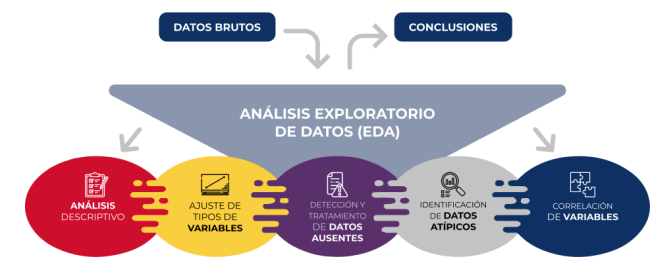

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

In [107]:
import kagglehub
import os

path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [108]:
directory_path = '/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1'
files = os.listdir(directory_path)
print(files)

file_path = '/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv'

df = pd.read_csv(file_path)
df

['Titanic-Dataset.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [109]:
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
print(df.info())
print(df.describe())
print(df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

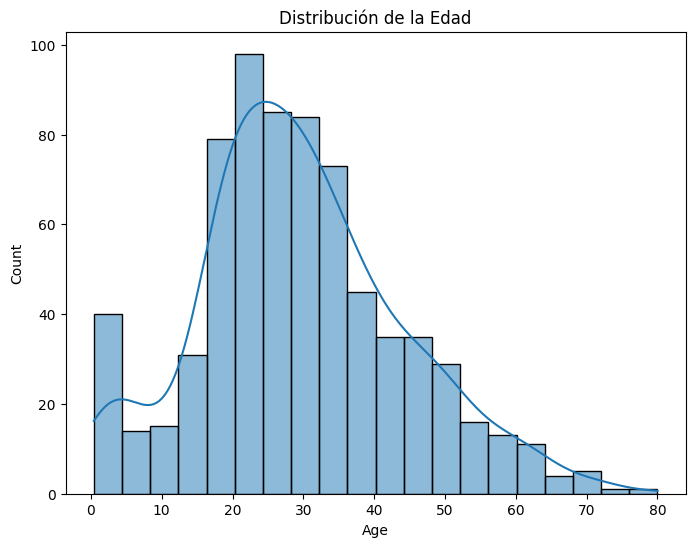

In [111]:
# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.show()

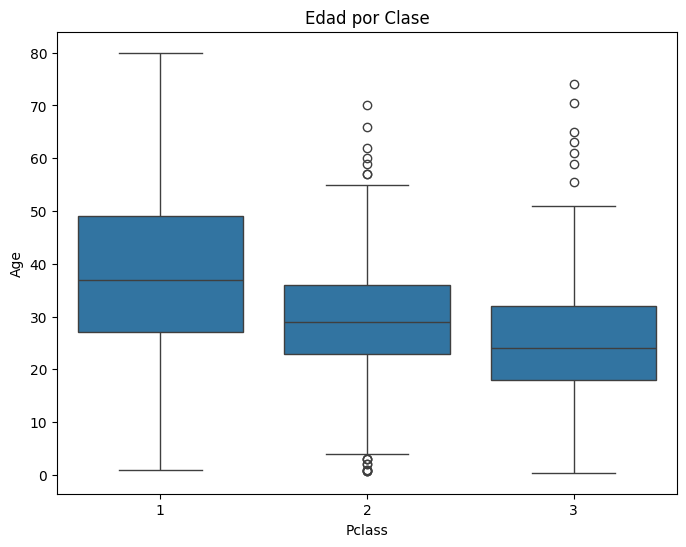

In [112]:
# Boxplot de la edad por clase
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Edad por Clase')
plt.show()

Cómo podemos llenar los datos nulos?

Para llenar datos nulos (valores faltantes) en un conjunto de datos, existen múltiples técnicas según el contexto, el tipo de datos y el motivo de los valores faltantes. Aquí te explico las estrategias más comunes:
1. Eliminación de datos
•	Eliminar filas (rows): Si los valores nulos son pocos y aleatorios, puedes eliminar las filas afectadas.

Ejemplo en pandas: df.dropna(axis=0).

Riesgo: Pérdida de información si hay muchos valores faltantes.

•	Eliminar columnas (columns): Si una columna tiene demasiados valores nulos (ej. >70%), puede ser mejor eliminarla.

Ejemplo: df.dropna(axis=1, thresh=0.3*len(df)).

2. Imputación con medidas de tendencia central

•	Media: Para datos numéricos sin outliers.

Ejemplo: df['columna'].fillna(df['columna'].mean()).

•	Mediana: Si hay outliers en datos numéricos.

Ejemplo: df['columna'].fillna(df['columna'].median()).

•	Moda: Para variables categóricas o discretas.

Ejemplo: df['columna'].fillna(df['columna'].mode()[0]).

3. Imputación basada en modelos

•	Regresión o algoritmos predictivos: Usar otras variables para predecir los valores faltantes (ej. regresión lineal, Random Forest).

•	K-Nearest Neighbors (KNN): Busca registros similares y usa sus valores para imputar.
Ejemplo en Python: KNNImputer de sklearn.impute.



Los datos disponibles son suficientes para generar un modelo mínimo viable?

Si siempre y cuando se tengan en cuenta:

Se aplique un preprocesamiento adecuado (imputación, transformación de variables).

Se elijan algoritmos que funcionen bien con datasets pequeños.

Se valide el modelo con métricas robustas y técnicas como train-test split o cross-validation.

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si
* qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.



In [113]:
# 1. Convertir 'Age' a entero (imputando nulos con la mediana)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)

# 2. Verificar tipos de 'Survived' y 'Pclass' (ya son numéricos)
print("\n\033[1mTipos de datos:\033[0m")
print(df[['Survived', 'Pclass', 'Age']].dtypes)

# 3. Crear nuevo dataset
df.to_csv("titanic_age_int.csv", index=False)

# Comprobamos que tipo de dato tenemos en AGE
df.info()
# Confirmamos con .head()
df.head()


Tipos de datos:
Survived    int64
Pclass      int64
Age         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

In [114]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [116]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Embarked,2
PassengerId,0
Survived,0
Name,0
Pclass,0
Sex,0
Age,0
Parch,0
SibSp,0


In [117]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [118]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Embarked,0.002245
PassengerId,0.000000
Survived,0.000000
Name,0.000000
Pclass,0.000000
Sex,0.000000
Age,0.000000
Parch,0.000000
SibSp,0.000000


In [119]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [120]:

# Separación de características y target
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

def plot_learning_curve(estimator, title, X, y, xlim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    # 1. Inicialización de la figura
    plt.figure()  # Crea una nueva figura de matplotlib
    plt.title(title)  # Establece el título del gráfico

    # 2. Configuración de ejes
    if ylim is not None:
        plt.ylim(0.5)  # Establece límites del eje Y (ej: (0.5, 1.0))
    plt.xlabel("Ejemplos de entrenamiento")  # Etiqueta eje X
    plt.ylabel("Puntuación de validación")  # Etiqueta eje Y

    # 3. Cálculo de curvas de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        X,
        y,
        cv=5,      # Estrategia de validación cruzada (int o objeto CV)
        n_jobs=1,  # Núcleos CPU a usar (-1 = todos)
        train_sizes=np.linspace(0.1, 1.0, 5)  # Tamaños relativos del dataset (ej: [0.1, 0.5, 1.0])
    )

    # 4. Cálculo de estadísticas
    train_scores_mean = np.mean(train_scores, axis=1)  # Media de scores de entrenamiento
    train_scores_std = np.std(train_scores, axis=1)    # Desviación estándar
    test_scores_mean = np.mean(test_scores, axis=1)    # Media de scores de validación
    test_scores_std = np.std(test_scores, axis=1)      # Desviación estándar

    # 5. Configuración visual
    plt.grid()  # Agrega cuadrícula al gráfico

    # 6. Áreas de variabilidad
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")  # Área roja para entrenamiento
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  # Área verde para validación

    # 7. Líneas principales
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")  # Línea roja con marcadores
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")  # Línea verde con marcadores

    # 8. Elementos finales
    plt.legend(loc="best")  # Leyenda en mejor posición automática
    plt.show()
    return plt  # Devuelve el objeto de figura para manipulación posterior

Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?

En este caso vamos a llenar los datos nulos por medio de K-nn

In [122]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Verificar valores nulos
print("Valores nulos antes de la imputación:")
print(df.isnull().sum())

# 2. Eliminar columnas no útiles para KNN
columnas_a_eliminar = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_temp = df.drop(columns=columnas_a_eliminar, errors='ignore')

# 3. Manejar valores faltantes en categóricas (Embarked)
df_temp['Embarked'] = df_temp['Embarked'].fillna(df_temp['Embarked'].mode()[0])

# 4. Codificar variables categóricas con One-Hot Encoding
categorical_cols = ['Sex', 'Embarked']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

df_encoded = preprocessor.fit_transform(df_temp)

# 5. Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 6. Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_scaled)

# 7. Revertir escalado
df_imputed = scaler.inverse_transform(df_imputed)

# 8. Convertir a DataFrame y decodificar variables categóricas
df_final = pd.DataFrame(df_imputed, columns=preprocessor.get_feature_names_out())
df_final = df_final.rename(columns={
    'cat__Sex_male': 'Sex_male',
    'cat__Embarked_Q': 'Embarked_Q',
    'cat__Embarked_S': 'Embarked_S'
})

# 9. Restaurar columnas eliminadas (si es necesario)
df_final = pd.concat([df_final, df[['PassengerId', 'Name', 'Ticket']]], axis=1)

# 10. Verificar resultados
print("\nValores nulos después de la imputación:")
print(df_final.isnull().sum())

df_final.head()

Valores nulos antes de la imputación:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores nulos después de la imputación:
Sex_male               0
Embarked_Q             0
Embarked_S             0
remainder__Survived    0
remainder__Pclass      0
remainder__Age         0
remainder__SibSp       0
remainder__Parch       0
remainder__Fare        0
PassengerId            0
Name                   0
Ticket                 0
dtype: int64


,Sex_male,Embarked_Q,Embarked_S,remainder__Survived,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare,PassengerId,Name,Ticket
0,1.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,"Braund, Mr. Owen Harris",A/5 21171
1,0.0,0.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,0.0,0.0,1.0,1.0,3.0,26.0,0.0,0.0,7.9250,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,0.0,0.0,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,1.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500,5,"Allen, Mr. William Henry",373450
